雷达图是一种显示多变量数据的图形方法。通常从同一中心点开始等角度间隔地射出三个以上的轴，每个轴代表一个定量变量，各轴上的点依次连接成线或几何图形。

雷达图可以用来在变量间进行对比，或者查看变量中有没有异常值。另外，多幅雷达图之间或者雷达图的多层数据线之间，还可以进行总体数值情况的对比。

轴的相对位置和角度通常是无信息的。每个变量都具有自己的轴，彼此间的距离相等，所有轴都有相同的刻度。在将数据映射到这些轴上时，需要注意预先对数值进行标准化处理，保证各个轴之间的数值比例能够做同级别的比较。

绘制雷达图需要注意几个要点
1. 图形必须闭合，即最后一个点和第一个点要连接起来。
2. 每个轴的刻度值必须相同 --- 必须进行归一化处理，也就是将每个变量的数值转换到相同的刻度下，而不是不同变量量纲不同。

绘制雷达图，和绘制直方图有所区别，雷达图是一个环形，因此应该是在极坐标系上进行绘制，而在极坐标进行绘制，那么在创建子图的时候，就需要使用 subplot_kw=dict(polar=True) 指定该子图是在极坐标上进行绘制的

**而极坐标的绘制，提供的参数也和笛卡尔坐标有所区别，在极坐标中，x 轴表示角度，y 轴表示半径**

为了使得雷达图是一个闭环的图形，需要在绘制的时候，将第一个值和最后一个值进行连接起来

实现这一功能，需要在绘制的时候，将第一个值和最后一个值进行连接起来, 相应的 x 轴 和 y 轴的数据都需要进行该操作
```python
values_closed = np.concatenate((values, [values[0]]))
angles_closed = angles + [angles[0]]
```

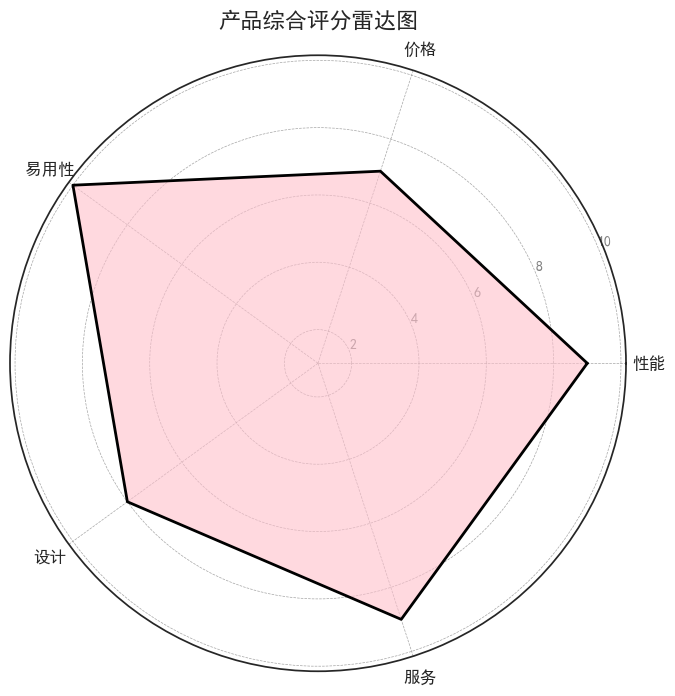

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False    

# 5个维度的评分（如产品特性）
labels = ['性能', '价格', '易用性', '设计', '服务']
values = [8, 6, 9, 7, 8]  # 评分数据
num_vars = len(labels)

# 创建角度数组（将圆周分成5等份）
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 为了闭合图形，重复第一个值和角度
values_closed = np.concatenate((values, [values[0]]))
angles_closed = angles + [angles[0]]

# 创建雷达图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 绘制填充区域
ax.fill(angles_closed, values_closed, color='pink', alpha=0.6)
ax.plot(angles_closed, values_closed, color='black', linewidth=2)

# 设置标签
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=12)

# 设置径向标签（评分刻度）
ax.set_yticks(range(1, 10, 2))
ax.set_yticklabels(['2', '4', '6', '8', '10'], color='grey', size=10)

# 设置标题
ax.set_title('产品综合评分雷达图', size=16, pad=20)

# 优化显示
ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

除了使用原始的 matplotlib 进行绘制外，还可以使用 plotly 进行绘制可交互的雷达图

1. 语法更加简单
2. 图像可交互，比如可以通过鼠标悬停查看数据详情


In [12]:
import plotly.graph_objects as go

# 数据
labels = ['性能', '价格', '易用性', '设计', '服务']
values = [8, 6, 9, 7, 8]

# 创建雷达图
fig = go.Figure(data=go.Scatterpolar(
    r=values + [values[0]],  # 闭合图形
    theta=labels + [labels[0]],  # 闭合标签
    fill='toself',
    name='产品评分'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 10])
    ),
    showlegend=True,
    title='交互式雷达图'
)

fig.show()